In [1]:
# 1°) Importamos las librerias a utilizar
## PYTHON ##
import pandas as pd
import numpy as np
import datetime

# Para que me muestre los datos completos y no salgan cortados
# le indico que ancho de las columnas
pd.options.display.max_colwidth = None  #con None es para todos los caracteres posibles

## VISUALIZACIONES ##
import matplotlib.pyplot as plt
import seaborn as sns

# 2° Dataset: HOTELS

In [2]:
# Lectura del fichero
df_hotels = pd.read_csv("C:/Users/Santiago/Desktop/EDA/hotels.csv")
df_hotels.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


In [3]:
# Analizamos desde que rango de fecha son los datos:
print(f'Inicio: {pd.to_datetime(df_hotels["date"]).min()}')
print(f'Fin: {pd.to_datetime(df_hotels["date"]).max()}')

Inicio: 2019-09-26 00:00:00
Fin: 2023-07-13 00:00:00


Observaciones: selecciono un rango de fechas para realizar el analisis. El mismo para flights

In [4]:
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   travelCode  40552 non-null  int64  
 1   userCode    40552 non-null  int64  
 2   name        40552 non-null  object 
 3   place       40552 non-null  object 
 4   days        40552 non-null  int64  
 5   price       40552 non-null  float64
 6   total       40552 non-null  float64
 7   date        40552 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.5+ MB


In [5]:
df_hotels.describe(include='all')

,travelCode,userCode,name,place,days,price,total,date
count,40552.000000,40552.000000,40552,40552,40552.000000,40552.000000,40552.000000,40552
unique,NaN,NaN,9,9,NaN,NaN,NaN,199
top,NaN,NaN,Hotel K,Salvador (BH),NaN,NaN,NaN,10/31/2019
freq,NaN,NaN,5094,5094,NaN,NaN,NaN,404
mean,67911.794461,666.963726,NaN,NaN,2.499679,214.439554,536.229513,NaN
std,39408.199333,391.136794,NaN,NaN,1.119326,76.742305,319.331482,NaN
min,0.000000,0.000000,NaN,NaN,1.000000,60.390000,60.390000,NaN
25%,33696.750000,323.000000,NaN,NaN,1.000000,165.990000,247.620000,NaN
50%,67831.000000,658.000000,NaN,NaN,2.000000,242.880000,495.240000,NaN
75%,102211.250000,1013.000000,NaN,NaN,4.000000,263.410000,742.860000,NaN


Descripción de las variables:
* **travelCode** (v.numérica): userCode es unico para cada cliente
* **userCode** (v.categórica): 5 tipos de companias de viaje
* **name**: notamos que hay 9 tipos de hoteles
* **place** (v.categórica): notamos que hay 9 tipos de ciudades
* **days** (v.numérica): 
* **price**(v.numérica): precio/dia
* **total**(v.numérica): precio total = precio*dias
* **date**(v.numérica): 

In [6]:
df_hotels['name'].unique()

array(['Hotel A', 'Hotel K', 'Hotel BD', 'Hotel Z', 'Hotel AU',
       'Hotel AF', 'Hotel BW', 'Hotel CB', 'Hotel BP'], dtype=object)

In [7]:
df_hotels['days'].unique()

array([4, 2, 3, 1], dtype=int64)

In [8]:
df_hotels['userCode'].unique().size

1310

C:\Users\Santiago\AppData\Local\Temp\ipykernel_2328\4167446034.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_hotels.corr(), annot=True)


<AxesSubplot: >

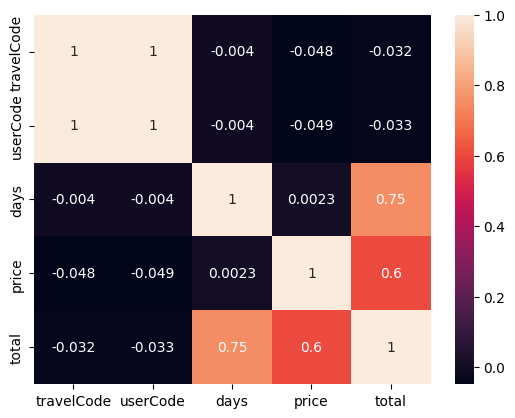

In [9]:
# Heatmap/Mapa de Correlación
sns.heatmap(df_hotels.corr(), annot=True)

Observaciones:

### 3. Data Cleaning

**Missings/Valores nulos**

In [10]:
df_hotels.isna().sum()

travelCode    0
userCode      0
name          0
place         0
days          0
price         0
total         0
date          0
dtype: int64

In [11]:
df_hotels.isnull().sum()

travelCode    0
userCode      0
name          0
place         0
days          0
price         0
total         0
date          0
dtype: int64

In [12]:
df_hotels.days.value_counts()

1    10171
4    10163
2    10110
3    10108
Name: days, dtype: int64

In [13]:
df_hotels.place.value_counts()

Salvador (BH)          5094
Rio de Janeiro (RJ)    5029
Natal (RN)             4829
Sao Paulo (SP)         4828
Recife (PE)            4467
Brasilia (DF)          4437
Campo Grande (MS)      4333
Aracaju (SE)           4205
Florianopolis (SC)     3330
Name: place, dtype: int64

In [14]:
df_hotels.name.value_counts()

Hotel K     5094
Hotel CB    5029
Hotel BD    4829
Hotel AF    4828
Hotel AU    4467
Hotel BP    4437
Hotel BW    4333
Hotel Z     4205
Hotel A     3330
Name: name, dtype: int64

**Outliers**

**Transformaciones**

In [15]:
# Agregamos columna 'year-month-day' para leer y manipular la fecha:
df_hotels["year-month-day"] = pd.to_datetime(df_hotels["date"])

In [16]:
# Tomamos un rango de fechas para hacer el analisis: 2019-09-26 hasta 2021-09-26
df_hotels = df_hotels.loc[(df_hotels['year-month-day'] >= '2019-09-26') & (df_hotels['year-month-day'] <= '2021-09-26')]
# Ordenamos el DF por fecha: de menor a mayor 
df_hotels  = df_hotels.sort_values(by=['year-month-day'])
df_hotels

,travelCode,userCode,name,place,days,price,total,date,year-month-day
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019,2019-09-26
25851,86899,858,Hotel K,Salvador (BH),4,263.41,1053.64,09/26/2019,2019-09-26
1385,4701,47,Hotel BW,Campo Grande (MS),2,60.39,120.78,09/26/2019,2019-09-26
24681,82984,810,Hotel A,Florianopolis (SC),3,313.02,939.06,09/26/2019,2019-09-26
34241,114921,1143,Hotel K,Salvador (BH),4,263.41,1053.64,09/26/2019,2019-09-26
...,...,...,...,...,...,...,...,...,...
5284,17415,174,Hotel A,Florianopolis (SC),1,313.02,313.02,09/23/2021,2021-09-23
24664,82931,809,Hotel AF,Sao Paulo (SP),2,139.10,278.20,09/23/2021,2021-09-23
34979,117304,1162,Hotel BP,Brasilia (DF),4,247.62,990.48,09/23/2021,2021-09-23
16791,55846,544,Hotel BD,Natal (RN),1,242.88,242.88,09/23/2021,2021-09-23


In [17]:
df_hotels['userCode'].unique().size

1310